In [1]:
!pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold,cross_val_score,learning_curve

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score,recall_score,precision_score, confusion_matrix, classification_report,roc_curve,auc

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
#from pykrige.ok import OrdinaryKriging

In [3]:
#loading zone4 filled data
df_zone4=pd.read_csv(r"C:\Users\sreed\Downloads\filled_data_zone4_2014.csv")

In [4]:
df_zone4.head()

,Latitude,Longitude,Zone,NDVI,landuse,LST,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation,Suitable_Areas
0,45.47236,9.202701,zone4,0.360761,grass,121.681648,-0.130789,-0.381272,0,0.541073,0.0,0.214375,467.293863,0
1,45.47236,9.202971,zone4,0.361043,grass,121.681648,-0.130598,-0.381346,0,0.541497,0.0,0.215051,467.363286,0
2,45.47236,9.203240,zone4,0.361316,grass,121.681648,-0.130393,-0.381412,0,0.541907,0.0,0.215769,467.438801,0
3,45.47236,9.203510,zone4,0.361578,grass,121.681648,-0.130170,-0.381469,0,0.542301,0.0,0.216531,467.520987,0
4,45.47236,9.203779,zone4,0.361827,grass,121.681648,-0.129930,-0.381516,0,0.542676,0.0,0.217339,467.610465,0


In [5]:
df_zone4.isnull().sum()

Latitude           0
Longitude          0
Zone               0
NDVI               0
landuse            0
LST                0
NDBI               0
NDWI               0
Roughness          0
SAVI               0
Slope              0
SMI                0
solar_radiation    0
Suitable_Areas     0
dtype: int64

No null values

In [6]:
#loading zone9 filled data
df_zone9=pd.read_csv(r"C:\Users\sreed\Downloads\filled_data_zone9_2014.csv")

In [7]:
df_zone9.head()

,Latitude,Longitude,Zone,NDVI,landuse,LST,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation,Suitable_Areas
0,45.5365,9.143143,zone9,0.199839,meadow,NaN,0.012082,-0.228503,0,0.299694,0.0,0.324271,471.151147,0
1,45.5365,9.143412,zone9,0.199015,meadow,NaN,0.012169,-0.227788,0,0.298458,0.0,0.324271,471.140292,0
2,45.5365,9.143682,zone9,0.198166,meadow,NaN,0.012258,-0.227050,0,0.297184,0.0,0.324271,471.129071,0
3,45.5365,9.143951,zone9,0.197290,meadow,NaN,0.012349,-0.226290,0,0.295871,0.0,0.324271,471.117467,0
4,45.5365,9.144221,zone9,0.196386,meadow,NaN,0.012442,-0.225505,0,0.294517,0.0,0.324271,471.105458,0


In [8]:
df_zone9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62370 entries, 0 to 62369
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         62370 non-null  float64
 1   Longitude        62370 non-null  float64
 2   Zone             62370 non-null  object 
 3   NDVI             62370 non-null  float64
 4   landuse          62370 non-null  object 
 5   LST              0 non-null      float64
 6   NDBI             62370 non-null  float64
 7   NDWI             62370 non-null  float64
 8   Roughness        62370 non-null  int64  
 9   SAVI             62370 non-null  float64
 10  Slope            62370 non-null  float64
 11  SMI              62370 non-null  float64
 12  solar_radiation  62370 non-null  float64
 13  Suitable_Areas   62370 non-null  int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 6.7+ MB


In [9]:
#Concatinating zone4 and zone 9 data
df_2014=pd.concat([df_zone4,df_zone9])

In [10]:
df_2014.head()

,Latitude,Longitude,Zone,NDVI,landuse,LST,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation,Suitable_Areas
0,45.47236,9.202701,zone4,0.360761,grass,121.681648,-0.130789,-0.381272,0,0.541073,0.0,0.214375,467.293863,0
1,45.47236,9.202971,zone4,0.361043,grass,121.681648,-0.130598,-0.381346,0,0.541497,0.0,0.215051,467.363286,0
2,45.47236,9.203240,zone4,0.361316,grass,121.681648,-0.130393,-0.381412,0,0.541907,0.0,0.215769,467.438801,0
3,45.47236,9.203510,zone4,0.361578,grass,121.681648,-0.130170,-0.381469,0,0.542301,0.0,0.216531,467.520987,0
4,45.47236,9.203779,zone4,0.361827,grass,121.681648,-0.129930,-0.381516,0,0.542676,0.0,0.217339,467.610465,0


In [11]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114446 entries, 0 to 62369
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Latitude         114446 non-null  float64
 1   Longitude        114446 non-null  float64
 2   Zone             114446 non-null  object 
 3   NDVI             114446 non-null  float64
 4   landuse          114446 non-null  object 
 5   LST              52076 non-null   float64
 6   NDBI             114446 non-null  float64
 7   NDWI             114446 non-null  float64
 8   Roughness        114446 non-null  int64  
 9   SAVI             114446 non-null  float64
 10  Slope            114446 non-null  float64
 11  SMI              114446 non-null  float64
 12  solar_radiation  114446 non-null  float64
 13  Suitable_Areas   114446 non-null  int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 13.1+ MB


In [12]:
df_2014.isnull().sum()

Latitude               0
Longitude              0
Zone                   0
NDVI                   0
landuse                0
LST                62370
NDBI                   0
NDWI                   0
Roughness              0
SAVI                   0
Slope                  0
SMI                    0
solar_radiation        0
Suitable_Areas         0
dtype: int64

Null vlaues in LST data in enitre rows so will drop the column

In [13]:
#droping LST column
df_2014.drop('LST',axis=1,inplace=True)

In [14]:
df_2014.isnull().sum()

Latitude           0
Longitude          0
Zone               0
NDVI               0
landuse            0
NDBI               0
NDWI               0
Roughness          0
SAVI               0
Slope              0
SMI                0
solar_radiation    0
Suitable_Areas     0
dtype: int64

In [15]:
df_2014.columns

Index(['Latitude', 'Longitude', 'Zone', 'NDVI', 'landuse', 'NDBI', 'NDWI',
       'Roughness', 'SAVI', 'Slope', 'SMI', 'solar_radiation',
       'Suitable_Areas'],
      dtype='object')

In [16]:
df_2014['landuse'].unique()

array(['grass', 'military', 'industrial', 'farmland', 'residential',
       'allotments', 'farmyard', 'construction', 'meadow', 'forest',
       'commercial', 'village_green', 'railway', 'retail',
       'plant_nursery', 'brownfield', 'recreation_ground', 'religious'],
      dtype=object)

Class balance:
0    0.963031
1    0.036969
Name: Suitable_Areas, dtype: float64


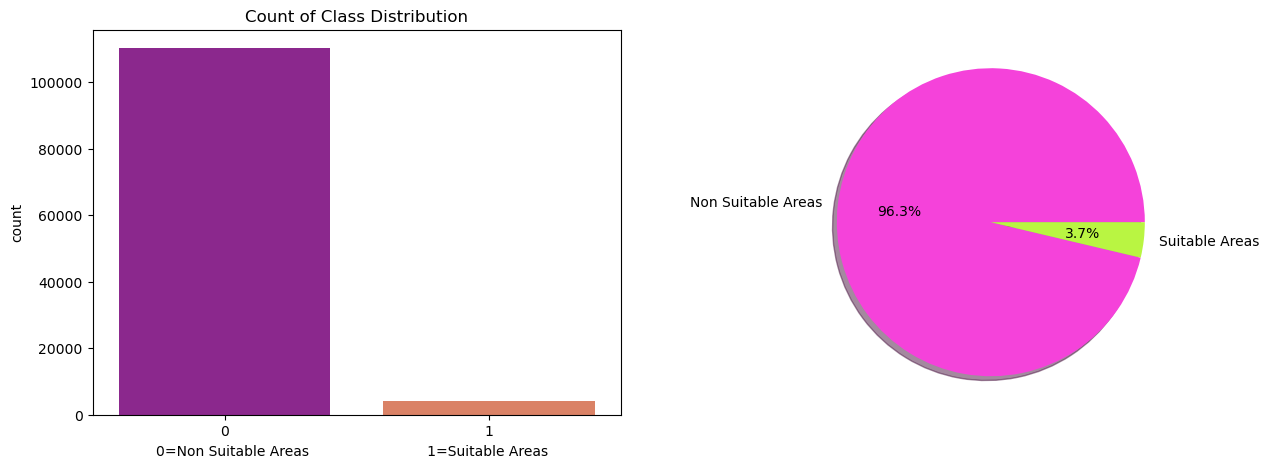

In [17]:
# Counting the number of samples in each class
class_counts =df_2014['Suitable_Areas'].value_counts()
class_counts

# Calculating the class balance
total_samples = len(df_2014)
balance_ratio = class_counts / total_samples

# Printing the class balance
print("Class balance:")
print(balance_ratio)
# Visualizing number of suitable area values in dataset
plt.figure(figsize=(15,5))

# Creating bar plot showing count of suitable areas value
plt.subplot(1, 2, 1)
sns.countplot(x = "Suitable_Areas", data = df_2014,palette='plasma')
plt.xlabel('0=Non Suitable Areas                           1=Suitable Areas  ')
plt.title("Count of Class Distribution")

# Creating pie chart showing proportion of suitable areas value
plt.subplot(1, 2, 2)
plt.pie(df_2014["Suitable_Areas"].value_counts(), labels = ['Non Suitable Areas',     'Suitable Areas  '], shadow = True, autopct = "%1.1f%%", colors = ['#f542da','#b9f542'])

# Displaying plots
plt.show()

<AxesSubplot:>

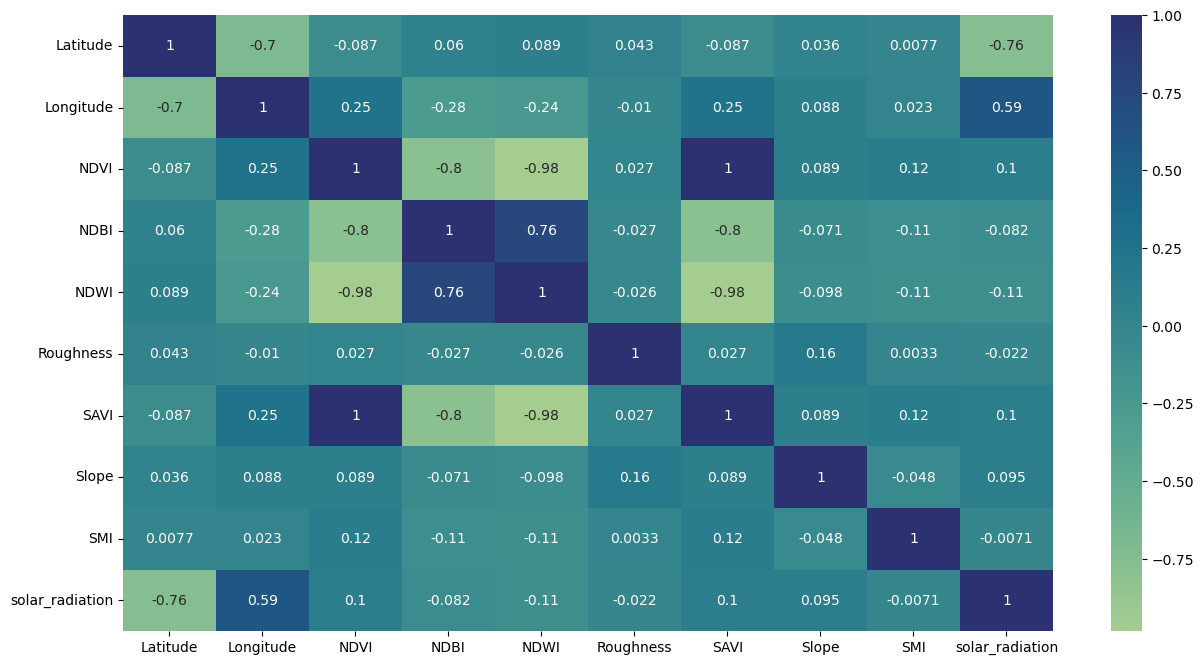

In [18]:
columns=['Latitude', 'Longitude', 'NDVI', 'NDBI', 'NDWI', 'Roughness', 'SAVI',
       'Slope', 'SMI', 'solar_radiation']
plt.figure(figsize=(15,8))
#calculating correlation matrix of numerial columns
corr_matrix=df_2014[columns].corr()

#Plotting the correlation matrix using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='crest')

In [19]:
corr_matrix

,Latitude,Longitude,NDVI,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation
Latitude,1.000000,-0.704151,-0.086561,0.060447,0.089500,0.042754,-0.086559,0.036104,0.007684,-0.763753
Longitude,-0.704151,1.000000,0.247244,-0.282053,-0.235407,-0.010004,0.247245,0.088254,0.023194,0.594479
NDVI,-0.086561,0.247244,1.000000,-0.797562,-0.983343,0.027191,0.999998,0.088656,0.123699,0.104353
NDBI,0.060447,-0.282053,-0.797562,1.000000,0.762892,-0.027076,-0.797563,-0.070935,-0.106375,-0.081996
NDWI,0.089500,-0.235407,-0.983343,0.762892,1.000000,-0.025557,-0.983331,-0.098477,-0.108643,-0.108133
Roughness,0.042754,-0.010004,0.027191,-0.027076,-0.025557,1.000000,0.027191,0.163587,0.003307,-0.022468
SAVI,-0.086559,0.247245,0.999998,-0.797563,-0.983331,0.027191,1.000000,0.088703,0.123709,0.104349
Slope,0.036104,0.088254,0.088656,-0.070935,-0.098477,0.163587,0.088703,1.000000,-0.048385,0.094702
SMI,0.007684,0.023194,0.123699,-0.106375,-0.108643,0.003307,0.123709,-0.048385,1.000000,-0.007088
solar_radiation,-0.763753,0.594479,0.104353,-0.081996,-0.108133,-0.022468,0.104349,0.094702,-0.007088,1.000000



Latitude and Solar Radiation (-0.764): As latitude increases, solar radiation tends to decrease. This is because solar radiation is more direct near the equator and more diffuse towards the poles.

NDVI and SAVI (0.999): NDVI and SAVI are nearly perfectly correlated, which is expected because SAVI is derived from NDVI.

NDVI and NDBI (-0.798): NDVI and NDBI are moderately negatively correlated, which means areas with high vegetation cover (high NDVI) tend to have low built-up areas (low NDBI).

### Preprocessing

In [20]:

y = df_2014['Suitable_Areas']
X = df_2014.drop(columns=['Suitable_Areas'])

# Defining the  columns
numerical_features = ['NDVI',  'NDBI', 'NDWI', 'Roughness', 'SAVI', 'Slope', 'SMI', 'solar_radiation']
categorical_features = ['Zone', 'landuse']

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Fitting  the preprocessor on the training data and transform both training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Getting the names of the output columns after OneHotEncoding
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combining numerical and categorical feature names
all_feature_names = numerical_features + list(cat_feature_names)

# Converting to DataFrame with appropriate column names
df_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
df_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)




In [21]:
df_train_preprocessed.head()

,NDVI,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation,Zone_zone4,Zone_zone9,...,landuse_industrial,landuse_meadow,landuse_military,landuse_plant_nursery,landuse_railway,landuse_recreation_ground,landuse_religious,landuse_residential,landuse_retail,landuse_village_green
0,0.698372,-0.719860,-0.645282,-0.244436,0.698330,-1.178294,-0.080523,0.688411,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.470909,-2.747785,-2.200569,-0.150471,2.470809,0.848857,0.349169,0.466210,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.470538,0.475476,0.513773,-0.150471,-0.470713,0.848773,-0.008083,1.426112,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.745556,-2.138081,-1.417016,-0.244436,1.745388,0.848682,0.383834,-1.228176,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.464388,-0.771818,-0.003959,-0.244436,0.464285,0.848298,0.303835,-0.446656,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:

df_test_preprocessed.head()

,NDVI,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation,Zone_zone4,Zone_zone9,...,landuse_industrial,landuse_meadow,landuse_military,landuse_plant_nursery,landuse_railway,landuse_recreation_ground,landuse_religious,landuse_residential,landuse_retail,landuse_village_green
0,1.390726,-0.523036,-1.529443,-0.244436,1.390301,-1.178294,0.307890,-1.741513,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.938137,1.298569,1.030496,-0.244436,-0.938127,0.848298,-0.684925,0.111025,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.349587,-1.602846,-0.669837,-0.056506,0.349382,0.848890,0.354783,0.402249,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.768651,0.906857,0.958747,-0.244436,-0.767986,-1.178294,0.110620,-0.144305,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.787156,-2.040783,-1.817887,-0.244436,1.787028,0.848298,0.228358,-1.228176,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
!pip install imblearn

   ---------------------------------------- 258.3/258.3 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 301.8/301.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Applying the SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes

In [24]:
X_train=df_train_preprocessed
X_test=df_test_preprocessed
y_train=y_train
y_test=y_test

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### 1.Logistic Regression Model

In [27]:
# Training a logistic regression classifier
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Making predictions and evaluating the classifier
y_pred_log = logreg.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     22044
           1       0.06      0.61      0.12       846

    accuracy                           0.66     22890
   macro avg       0.52      0.63      0.45     22890
weighted avg       0.94      0.66      0.76     22890



### 2.Decision Tree Model

In [28]:

# Training a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Making predictions and evaluating the classifier
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96     22044
           1       0.25      0.49      0.33       846

    accuracy                           0.93     22890
   macro avg       0.62      0.72      0.65     22890
weighted avg       0.95      0.93      0.94     22890



## Ensemble Methods

### 3.Random Forest Model

In [29]:


# Training a classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Making predictions and evaluating the classifier
y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22044
           1       0.34      0.47      0.39       846

    accuracy                           0.95     22890
   macro avg       0.66      0.72      0.68     22890
weighted avg       0.96      0.95      0.95     22890



### 4.Gradient Boosting Model

In [30]:
# Training a gradient boosting classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled, y_train_resampled)

# Making predictions and evaluating the classifier
y_pred_gb= gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     22044
           1       0.09      0.60      0.16       846

    accuracy                           0.76     22890
   macro avg       0.54      0.69      0.51     22890
weighted avg       0.95      0.76      0.84     22890



### 5.XGBoost Model

In [31]:
# Training an XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)

# Making predictions and evaluating the classifier
y_pred_xgb= xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     22044
           1       0.20      0.52      0.29       846

    accuracy                           0.90     22890
   macro avg       0.59      0.72      0.62     22890
weighted avg       0.95      0.90      0.92     22890



In [33]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# List of classifiers
classifiers = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb,
    #'Support Vector Classifier': svc,
}

# Evaluating each classifier
for name, clf in classifiers.items():
    y_pred_train = clf.predict(X_train_resampled)
    y_pred_test = clf.predict(X_test)

#training metrics
    print(f"Metrics report for {name}:\n")
    print("Training Set Metrics:")
    print(f"Accuracy: {accuracy_score(y_train_resampled, y_pred_train)}")
    print(f"Precision: {precision_score(y_train_resampled, y_pred_train)}")
    print(f"Recall: {recall_score(y_train_resampled, y_pred_train)}")
    print(f"F1-Score: {f1_score(y_train_resampled, y_pred_train)}")
    print(f"ROC-AUC: {roc_auc_score(y_train_resampled, y_pred_train)}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_train_resampled, y_pred_train))

    print("\n")
    print(classification_report(y_train_resampled, y_pred_train))

#tesing metrics
    print("Test Set Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
    print(f"Precision: {precision_score(y_test, y_pred_test)}")
    print(f"Recall: {recall_score(y_test, y_pred_test)}")
    print(f"F1-Score: {f1_score(y_test, y_pred_test)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_test)}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    print("\n")
    print(classification_report(y_test, y_pred_test))

    print('*-----------------------------------------------------------------*')


Metrics report for Logistic Regression:

Training Set Metrics:
Accuracy: 0.632849803223282
Precision: 0.6394812988961526
Recall: 0.6090778147009788
F1-Score: 0.6239093813534707
ROC-AUC: 0.6328498032232819

Confusion Matrix:
 [[57895 30276]
 [34468 53703]]


              precision    recall  f1-score   support

           0       0.63      0.66      0.64     88171
           1       0.64      0.61      0.62     88171

    accuracy                           0.63    176342
   macro avg       0.63      0.63      0.63    176342
weighted avg       0.63      0.63      0.63    176342

Test Set Metrics:
Accuracy: 0.6591524683267802
Precision: 0.0644878537440521
Recall: 0.6087470449172577
F1-Score: 0.11662137681159421
ROC-AUC: 0.6349169809960994

Confusion Matrix:
 [[14573  7471]
 [  331   515]]


              precision    recall  f1-score   support

           0       0.98      0.66      0.79     22044
           1       0.06      0.61      0.12       846

    accuracy                        